In [7]:
import numpy
from matplotlib import pyplot
import matplotlib.animation as animation
%matplotlib notebook

In [8]:
r = 1

<IPython.core.display.Javascript object>


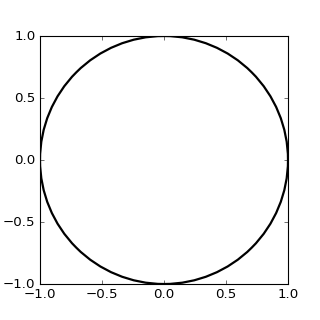

In [9]:
fig = pyplot.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
circle = pyplot.Circle((0, 0), r, color="black", fill=False, lw=2, zorder=10)
ax.add_artist(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect("equal")
pyplot.show()

In [109]:
N = 4000
delta = r / 5.0

<IPython.core.display.Javascript object>


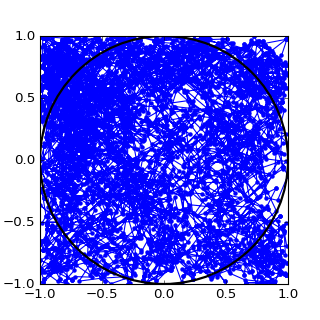

In [110]:
fig = pyplot.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
circle = pyplot.Circle((0, 0), r, color="black", fill=False, lw=2, zorder=10)
ax.add_artist(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect("equal")

xdata = [r]
ydata = [r]

line, = ax.plot(xdata, ydata, "-o", ms=4, markeredgecolor="none")

def update(i):
    deltax, deltay = numpy.random.uniform(-delta, delta, size=2)
    x, y = xdata[-1], ydata[-1]
    if (numpy.abs(x + deltax) < r) and (numpy.abs(y + deltay) < r):
        x += deltax
        y += deltay
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,


# ani = animation.FuncAnimation(fig, update, numpy.arange(1, N - 1), interval=10, repeat=False)

for _ in range(N):
    update(_)

pyplot.show()

In [111]:
data = numpy.array([xdata, ydata])
norms = numpy.linalg.norm(data, axis=0)
in_circle = norms < 1

colors = numpy.full(norms.shape, "crimson")
colors[in_circle] = "green"

<IPython.core.display.Javascript object>


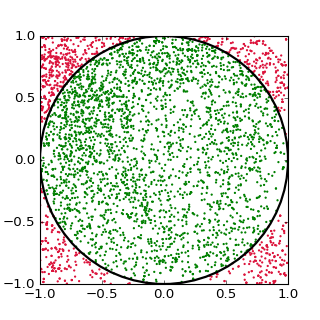

In [112]:
fig = pyplot.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
circle = pyplot.Circle((0, 0), r, color="black", fill=False, lw=2, zorder=10)
ax.add_artist(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect("equal")

ax.scatter(xdata, ydata, color=colors, s=1)
pyplot.show()

In [113]:
Nhits = numpy.count_nonzero(in_circle)
pi = 4 * Nhits / N

print(pi)

2.948


In [114]:
%%time
trials = 500
N = 1000
delta = r / 5.0

pi_arr = list()

last_point = [r, r]
for i in range(trials):
    xdata = [last_point[0]]
    ydata = [last_point[1]]
    
    for _ in range(N-1):
        deltax, deltay = numpy.random.uniform(-delta, delta, size=2)
        x, y = xdata[-1], ydata[-1]
        if (numpy.abs(x + deltax) < r) and (numpy.abs(y + deltay) < r):
            x += deltax
            y += deltay
        xdata.append(x)
        ydata.append(y)
        
    last_point = [xdata[-1], ydata[-1]]

    data = numpy.array([xdata, ydata])
    norms = numpy.linalg.norm(data, axis=0)
    in_circle = norms < 1

    Nhits = numpy.count_nonzero(in_circle)
    pi = 4 * Nhits / N
    
    pi_arr.append(pi)
    # print(i+1, Nhits, pi)

CPU times: user 6.85 s, sys: 14 ms, total: 6.86 s
Wall time: 6.83 s


In [115]:
pi_mean = numpy.mean(pi_arr)
pi_std = numpy.std(pi_arr)

<IPython.core.display.Javascript object>


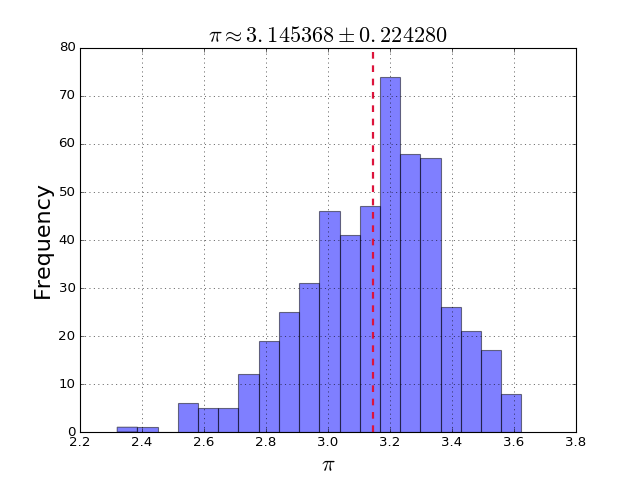

In [116]:
pyplot.figure()
pyplot.hist(pi_arr, bins=20, alpha=0.5)

pyplot.title(r"$\pi \approx %f \pm %f$" % (pi_mean, pi_std), fontsize=20)

pyplot.axvline(pi_mean, ls="--", color="crimson", lw=2)

pyplot.grid()
pyplot.xlabel(r"$\pi$", fontsize=20)
pyplot.ylabel(r"Frequency", fontsize=20)
pyplot.show()

In [117]:
N = 1000
trials = 10
delta_arr = numpy.linspace(0.001, 2*r, 20)

In [118]:
%%time
mean = list()
std = list()
for delta in delta_arr:
    accepted_arr = list()

    for _ in range(10): # 10 veces para poder sacar una barra de error, pudo haber sido otro número
        last_point = [r, r]
        accepted = 0
        for i in range(trials):
            xdata = [last_point[0]]
            ydata = [last_point[1]]

            for _ in range(N-1):
                deltax, deltay = numpy.random.uniform(-delta, delta, size=2)
                x, y = xdata[-1], ydata[-1]
                if (numpy.abs(x + deltax) < r) and (numpy.abs(y + deltay) < r):
                    x += deltax
                    y += deltay
                    accepted += 1
                xdata.append(x)
                ydata.append(y)

            last_point = [xdata[-1], ydata[-1]]

        percentage = accepted / (trials * N)
        accepted_arr.append(percentage)
    
    mean.append(numpy.mean(accepted_arr))
    std.append(numpy.std(accepted_arr))

CPU times: user 27.3 s, sys: 187 ms, total: 27.5 s
Wall time: 27.2 s


<IPython.core.display.Javascript object>


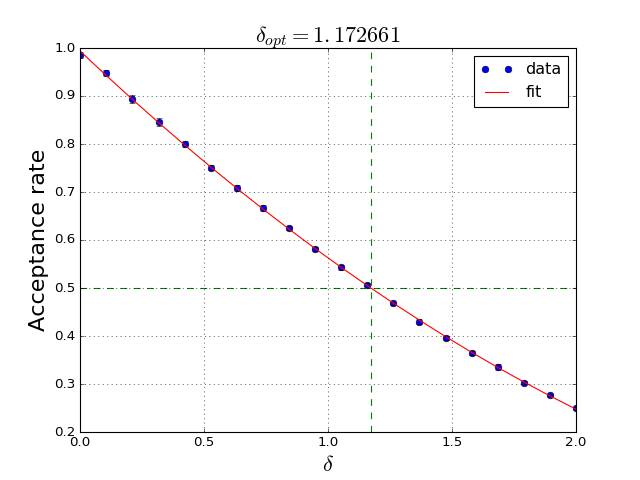

In [119]:
pyplot.figure()
pyplot.plot(delta_arr, mean, "o", label="data")
pyplot.errorbar(delta_arr, mean, yerr=std, fmt="none", ecolor="black")

params = numpy.polyfit(delta_arr, mean, 2)

pyplot.plot(delta_arr, numpy.polyval(params, delta_arr), "-r", label="fit")

p = numpy.poly1d(params)
roots = (p - 0.5).roots

root, = roots[(roots >= numpy.min(delta_arr)) & (roots <= numpy.max(delta_arr))]

pyplot.axvline(root, ls="--", color="green")
pyplot.axhline(0.5, ls="--", color="green")

pyplot.title(r"$\delta_{opt} = %f$" % root, fontsize=20)
pyplot.grid()
pyplot.legend()
pyplot.xlabel(r"$\delta$", fontsize=20)
pyplot.ylabel("Acceptance rate", fontsize=20)
pyplot.show()

In [120]:
%%time
trials = 500
N = 1000
delta = root

pi_arr = list()

last_point = [r, r]
for i in range(trials):
    xdata = [last_point[0]]
    ydata = [last_point[1]]
    
    for _ in range(N-1):
        deltax, deltay = numpy.random.uniform(-delta, delta, size=2)
        x, y = xdata[-1], ydata[-1]
        if (numpy.abs(x + deltax) < r) and (numpy.abs(y + deltay) < r):
            x += deltax
            y += deltay
        xdata.append(x)
        ydata.append(y)
        
    last_point = [xdata[-1], ydata[-1]]

    data = numpy.array([xdata, ydata])
    norms = numpy.linalg.norm(data, axis=0)
    in_circle = norms < 1

    Nhits = numpy.count_nonzero(in_circle)
    pi = 4 * Nhits / N
    
    pi_arr.append(pi)
    # print(i+1, Nhits, pi)

CPU times: user 6.78 s, sys: 14.7 ms, total: 6.79 s
Wall time: 6.77 s


In [121]:
pi_mean = numpy.mean(pi_arr)
pi_std = numpy.std(pi_arr)

In [122]:
pi_mean, pi_std

(3.1402160000000006, 0.1082092109942587)